<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Estimando_Distribuciones_Cont%C3%ADnuas_de_Datos_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
!pip install distfit

## 📊 Distribuciones de probabilidad

Estas distribuciones se utilizan ampliamente en estadística, simulación y ciencia de datos para modelar fenómenos aleatorios .

---

### ✅ Distribuciones continuas

#### **Erlang**
- **Tipo:** Continua (caso especial de Gamma)  
- **Parámetros:** $k$ (entero > 0), $\lambda$ (tasa)  
- **Soporte:** $x \ge 0$  
- **Descripción:** Modela el tiempo hasta completar $k$ eventos exponenciales independientes.  
- **Aplicaciones:** teoría de colas, tiempos de servicio con varias etapas.  
$$
f(x)=\frac{\lambda^k x^{k-1}e^{-\lambda x}}{(k-1)!}
$$

---

#### **Exponencial**
- **Tipo:** Continua  
- **Parámetros:** $\lambda$ (tasa)  
- **Soporte:** $x \ge 0$  
- **Descripción:** Tiempo entre eventos de un proceso Poisson; **no memoria**.  
- **Aplicaciones:** tiempos entre llegadas, fallas de sistemas.  
$$
f(x)=\lambda e^{-\lambda x}
$$

---

#### **Normal**
- **Tipo:** Continua  
- **Parámetros:** $\mu$ (media), $\sigma^2$ (varianza)  
- **Soporte:** $-\infty < x < \infty$  
- **Descripción:** Simétrica en forma de campana; fenómenos naturales y errores de medición.  
- **Aplicaciones:** alturas, puntajes, errores experimentales.  
$$
f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\,\exp\!\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

---

#### **Uniforme continua**
- **Tipo:** Continua  
- **Parámetros:** $a$ (mín), $b$ (máx)  
- **Soporte:** $a \le x \le b$  
- **Descripción:** Todos los valores del intervalo son equiprobables.  
- **Aplicaciones:** simulación base, incertidumbre sin sesgo.  
$$
f(x)=\frac{1}{b-a},\quad a\le x\le b
$$

---

### 📌 Resumen rápido

| Distribución | Tipo | Modelo típico / Uso |
|--------------|------|---------------------|
| Erlang | Continua | Tiempos con múltiples etapas (colas) |
| Exponencial | Continua | Tiempo entre eventos (no memoria) |
| Normal | Continua | Fenómenos naturales y errores |
| Uniforme | Continua | Incertidumbre sin sesgo |
```

#Generaremos muestras iniciales cada una de tamaño 100, que simularán las tomas reales, para luego descubrir que distribución se ajusta a ellos y realizar una comparación.

In [58]:
import numpy as np

rng = np.random.default_rng(42)   # reproducibilidad
N = 100

# --- Continuas ---
# Erlang(k, λ) ≡ Gamma(shape=k, scale=1/λ)
k_erlang, lam_erlang = 3, 0.5
erlang = rng.gamma(shape=k_erlang, scale=1/lam_erlang, size=N)

# Exponencial(λ)
lam_exp = 0.4
exponencial = rng.exponential(scale=1/lam_exp, size=N)

# Normal(μ, σ)
mu, sigma = 10.0, 2.0
normal = rng.normal(loc=mu, scale=sigma, size=N)

# Uniforme continua [a, b]
a_u, b_u = 0.0, 1.0
uniforme = rng.uniform(low=a_u, high=b_u, size=N)

# (Opcional) muestra rápida de las primeras entradas
for name, arr in [
    ("erlang", erlang), ("exponencial", exponencial), ("normal", normal),
    ("uniforme", uniforme)
]:
    print(f"{name}: {arr[:10]}")


erlang: [6.39172024 8.1789192  5.76184856 5.27864895 8.75184442 5.55190845
 7.01055747 6.63059425 8.74753913 4.75207154]
exponencial: [0.37656738 5.1686552  0.26647049 1.71060648 2.54381867 7.17501348
 0.72619539 4.33944975 1.90917343 4.32505011]
normal: [10.35302484 10.59198798  9.25617084  6.48655644 10.65599097 13.45470043
  6.93227719 11.72765603  9.34294955  9.87735131]
uniforme: [0.99910473 0.66568474 0.65012502 0.09044073 0.8970334  0.0289995
 0.24082806 0.14302188 0.77676794 0.19820423]


#Gráficas de la Distribuciones de Datos

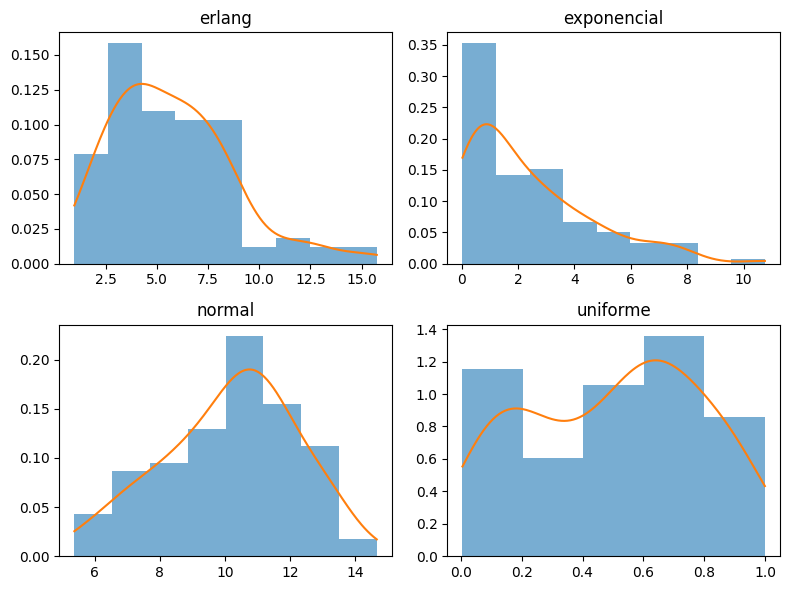

In [59]:
# === DISTPLOTS PARA VARIABLES CONTINUAS
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Diccionario de datos (nombre -> array)
data_dict = {
    "erlang": erlang,
    "exponencial": exponencial,
    "normal": normal,
    "uniforme": uniforme
}

fig, ax = plt.subplots(2, 2, figsize=(8,6))
for a, (name, x) in zip(ax.ravel(), data_dict.items()):
    xs = np.linspace(np.min(x), np.max(x), 200); a.hist(x, bins='fd', density=True, alpha=.6); a.plot(xs, gaussian_kde(x)(xs)); a.set_title(name)
plt.tight_layout()

# El siguiente bloque de código utiliza la librería **distfit** para identificar qué distribución teórica se ajusta mejor a un conjunto de datos (`erlang`) y obtener sus parámetros estimados:

{'name': 'beta', 'score': 0.0030792030749632764, 'loc': 0.6839244496148762, 'scale': 31.373186019411, 'arg': (np.float64(2.2593065894092117), np.float64(11.724016207811122)), 'params': (np.float64(2.2593065894092117), np.float64(11.724016207811122), np.float64(0.6839244496148762), np.float64(31.373186019411)), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x796f03384230>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': np.float64(1.84221243619854), 'CII_max_alpha': np.float64(11.418824679114836)}
(np.float64(2.2593065894092117), np.float64(11.724016207811122), np.float64(0.6839244496148762), np.float64(31.373186019411))


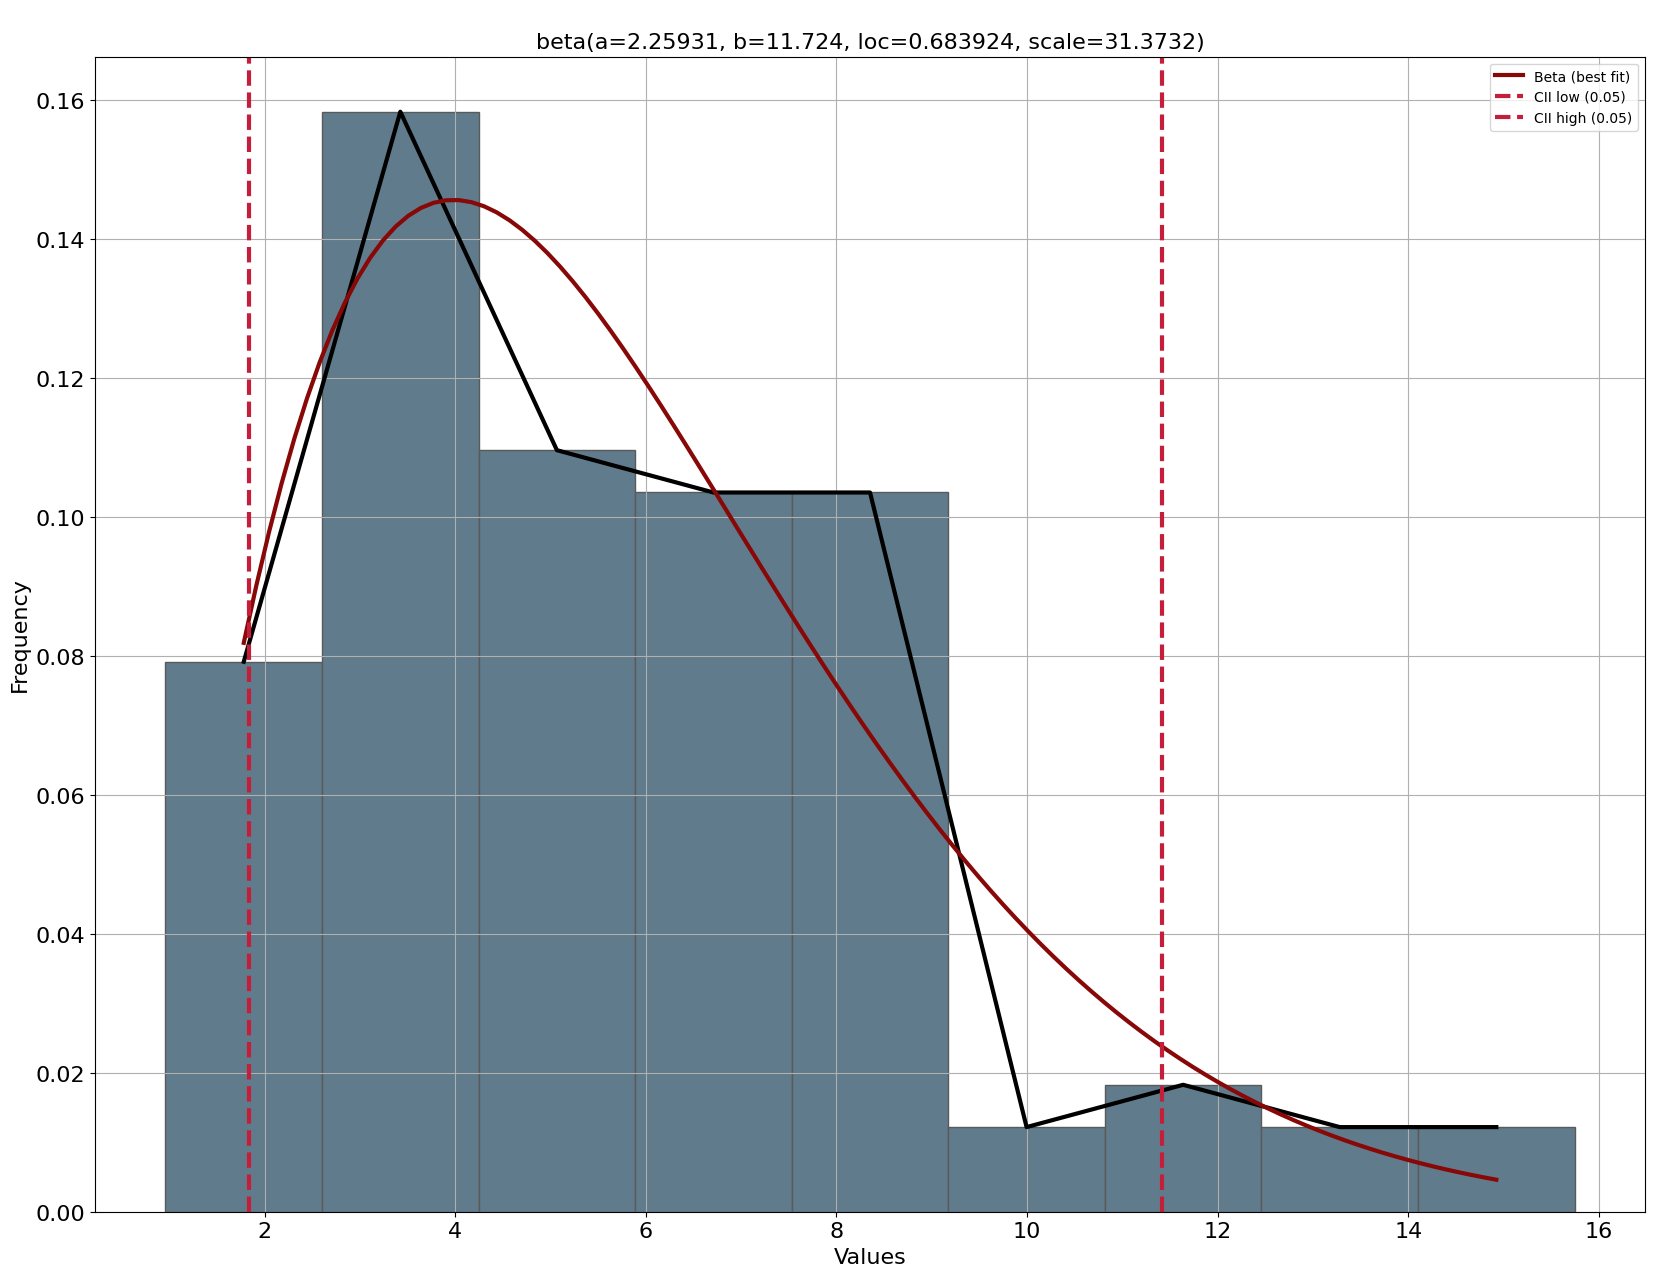

In [60]:
import numpy as np
from distfit import distfit
d = distfit(todf=False)
data = np.array(erlang)
d.fit_transform(data, verbose=False)
print(d.model)
d.plot()
print(d.model['params'])

## 📘 Interpretación del resultado de `distfit`

El ajuste indica que **la mejor distribución** para los datos es **Beta** (con desplazamiento y escala).

### 🔑 Campos clave del diccionario

- **name: 'beta'**  
  Distribución Beta (continua), aquí usada en su versión desplazada/escala.

- **arg: (α, β)**  
  Parámetros de **forma** de la Beta estándar:  
  - α = 2.2593065894092117  
  - β = 11.724016207811122

- **loc, scale**  
  Desplazamiento y escala que transforman la Beta de \([0,1]\) a \([loc, loc+scale]\):  
  - loc = 0.6839244496148762  
  - scale = 31.373186019411  
  - Soporte: $[0.6839,\ 32.0571]$ aprox.

- **params: (α, β, loc, scale)**  
  Paquete completo listo para usar con `scipy.stats.beta`.

- **model: <...rv_continuous_frozen>**  
  Objeto “congelado” de SciPy: permite llamar directamente `rvs/pdf/cdf/ppf` con esos parámetros.

- **score (RSS)**  
  `score = 0.003079...` es el **Residual Sum of Squares** del ajuste (menor = mejor).


# Generaremos 1000 datos sintéticos a partir de la distribución a la que se ajustan los datos.
## Nota: A partir de 100 datos, estimamos una distribución para poder generar más datos (1000).

In [61]:
from scipy import stats

name = d.model.get('name', d.model.get('distribution'))
params = d.model.get('params', tuple(d.model.get('arg', ())) + (d.model.get('loc',0), d.model.get('scale',1)))
synthetic = getattr(stats, name)(*params).rvs(size=1000, random_state=42)

# Ahora, graicaremos los datos reales (los 100 generados originalmente) y los sintéticos (a partir de la distribución estimada) y compararemos.

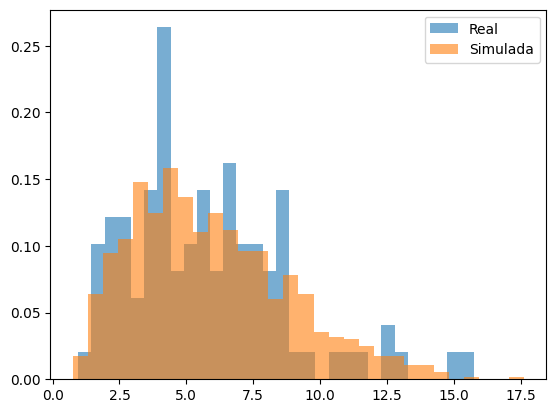

In [62]:
import matplotlib.pyplot as plt

plt.hist(data, bins=30, density=True, alpha=0.6, label="Real")
plt.hist(synthetic, bins=30, density=True, alpha=0.6, label="Simulada")
plt.legend()
plt.show()

# Tarea:
Estimar las distribuciones y parámetros para las muestras

1.   Estimar las distribuciones y parámetros para las muestras almacenadas en las variables exponencial, normal y uniforme.






Exponencial:
{'name': 'gamma', 'score': 0.004596547225975923, 'loc': 0.027878089527723086, 'scale': 2.673353374145311, 'arg': (np.float64(0.9054975786051975),), 'params': (np.float64(0.9054975786051975), np.float64(0.027878089527723086), np.float64(2.673353374145311)), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x796f0239ee70>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': np.float64(0.12351327358638894), 'CII_max_alpha': np.float64(7.539864899001969)}
Parámetros: (np.float64(0.9054975786051975), np.float64(0.027878089527723086), np.float64(2.673353374145311))


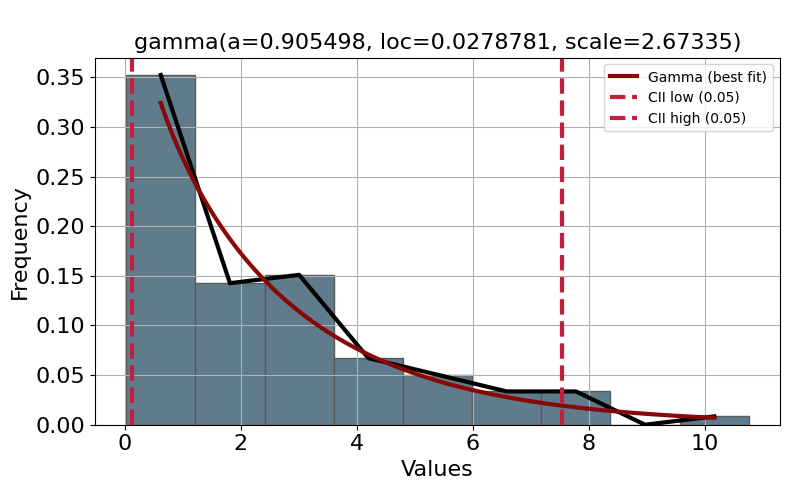

In [63]:
d_exp = distfit(todf=False)
data = np.array(exponencial)
d_exp.fit_transform(data, verbose=False)
print("Exponencial:")
print(d_exp.model)

d_exp.plot(figsize=(8,5))

plt.tight_layout()
print("Parámetros:", d_exp.model['params'])


Normal:
{'name': 'loggamma', 'score': 0.0044813003669008, 'loc': 2.7661432760728477, 'scale': 4.588872059120144, 'arg': (np.float64(5.500125809616654),), 'params': (np.float64(5.500125809616654), np.float64(2.7661432760728477), np.float64(4.588872059120144)), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x796f0333c320>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': np.float64(6.563223997365592), 'CII_max_alpha': np.float64(13.257341828610855)}
Parámetros: (np.float64(5.500125809616654), np.float64(2.7661432760728477), np.float64(4.588872059120144))


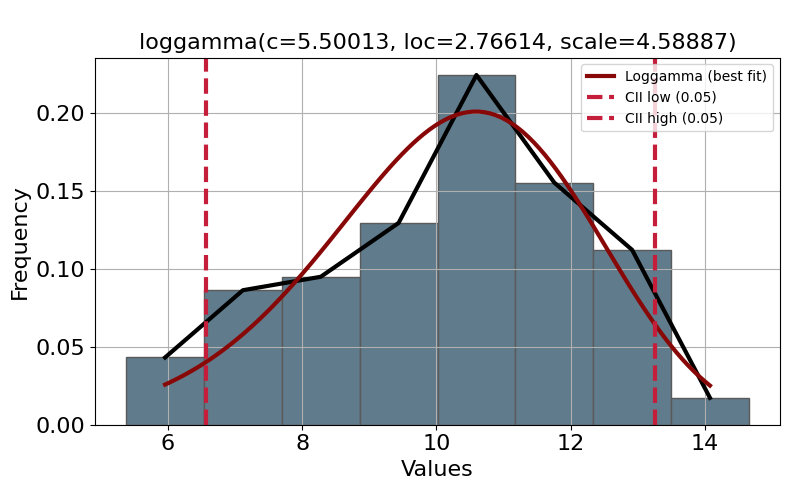

In [64]:
d_norm = distfit(todf=False)
data = np.array(normal)
d_norm.fit_transform(data, verbose=False)
print("Normal:")
print(d_norm.model)
d_norm.plot(figsize=(8,5))

plt.tight_layout()
print("Parámetros:", d_norm.model['params'])

uniforme:
{'name': 'uniform', 'score': 0.4277945753130448, 'loc': 0.0054298341287004614, 'scale': 0.9936748963455382, 'arg': (), 'params': (0.0054298341287004614, 0.9936748963455382), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x796f02327170>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': np.float64(0.055113578945977376), 'CII_max_alpha': np.float64(0.9494209856569616)}
Parámetros: (0.0054298341287004614, 0.9936748963455382)


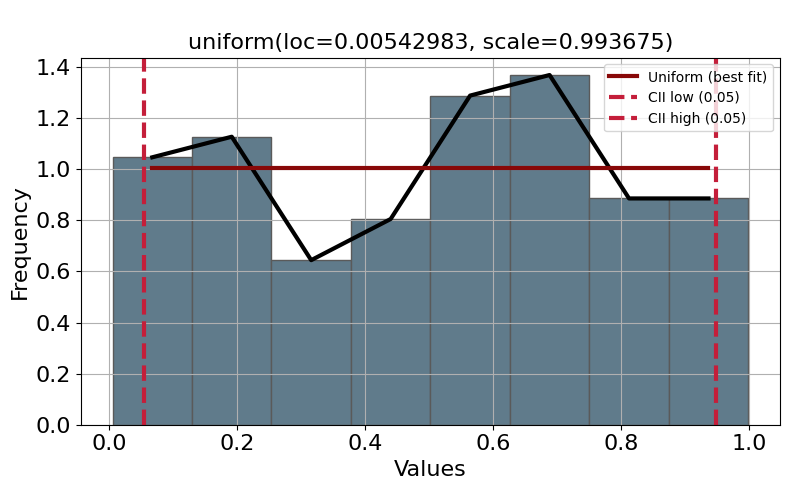

In [65]:
d_uni = distfit(todf=False)
data = np.array(uniforme)
d_uni.fit_transform(data, verbose=False)
print("uniforme:")
print(d_uni.model)

d_uni.plot(figsize=(8,5))

plt.tight_layout()
print("Parámetros:", d_uni.model['params'])

2.   Comparar si la distribución que originó la muestra es igual a la distribución estimada.


3.   Comparar cualitativamente si las distribuciones graficadas (real vs sintética) son similares.

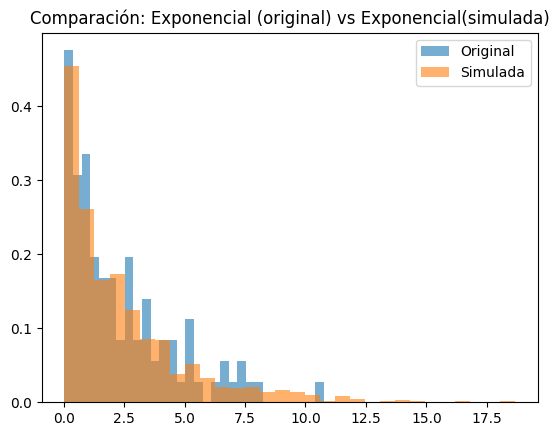

In [66]:
name = d_exp.model.get('name', d_exp.model.get('distribution'))
params = d_exp.model.get('params', tuple(d_exp.model.get('arg', ())) + (d_exp.model.get('loc', 0), d_exp.model.get('scale', 1)))

synthetic = getattr(stats, name)(*params).rvs(size=1000, random_state=42)

data = np.array(exponencial)

plt.hist(data, bins=30, density=True, alpha=0.6, label="Original")
plt.hist(synthetic, bins=30, density=True, alpha=0.6, label="Simulada")
plt.title("Comparación: Exponencial (original) vs Exponencial(simulada)")
plt.legend()
plt.show()

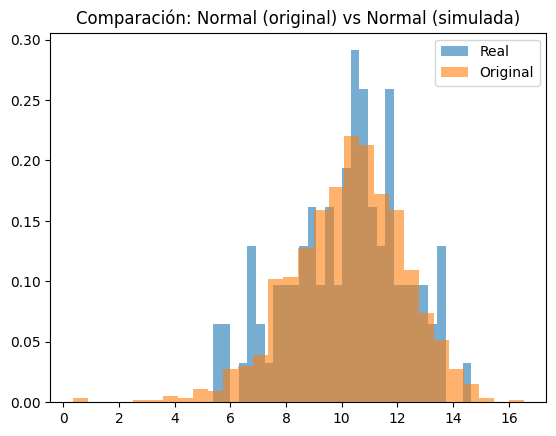

In [67]:
name = d_norm.model.get('name', d_norm.model.get('distribution'))
params = d_norm.model.get('params', tuple(d_norm.model.get('arg', ())) + (d_norm.model.get('loc', 0), d_norm.model.get('scale', 1)))

synthetic = getattr(stats, name)(*params).rvs(size=1000, random_state=42)

data = np.array(normal)

plt.hist(data, bins=30, density=True, alpha=0.6, label="Real")
plt.hist(synthetic, bins=30, density=True, alpha=0.6, label="Original")
plt.title("Comparación: Normal (original) vs Normal (simulada)")
plt.legend()
plt.show()

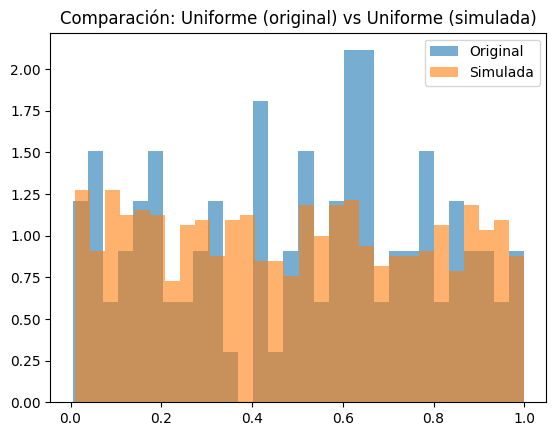

In [68]:
name = d_uni.model.get('name', d_uni.model.get('distribution'))
params = d_uni.model.get('params', tuple(d_uni.model.get('arg', ())) + (d_uni.model.get('loc', 0), d_uni.model.get('scale', 1)))

synthetic = getattr(stats, name)(*params).rvs(size=1000, random_state=42)

data = np.array(uniforme)

plt.hist(data, bins=30, density=True, alpha=0.6, label="Original")
plt.hist(synthetic, bins=30, density=True, alpha=0.6, label="Simulada")
plt.title("Comparación: Uniforme (original) vs Uniforme (simulada)")
plt.legend()
plt.show()

4.   Responder: ¿Qué es el SCORE o RSS que calcula el distfit? ¿Con respecto a qué se calcula?

El SCORE o RSS (Residual Sum of Squares) que calcula distfit es una medida que indica qué tan bien una distribución teórica se ajusta a los datos reales. Este valor se obtiene comparando las frecuencias observadas en el histograma de los datos con las frecuencias esperadas según la distribución teórica ajustada. En otras palabras, el RSS representa la suma de los cuadrados de las diferencias entre los valores observados y los valores estimados por el modelo. Cuanto menor sea este valor, mejor es el ajuste de la distribución. Por tanto, el distfit utiliza este puntaje para determinar cuál de las distribuciones probadas se adapta mejor a la muestra analizada.

5.   ¿Qué distribución sigue el siguiente conjunto de datos?:


> 191.088 178.781 199.534 191.382 173.618 193.244 185.665 192.927 175.524 189.795 176.583 187.396 198.267 181.183 186.406 197.473 193.006 192.881 187.241 187.850 193.267 192.581 195.991 200.364 188.597 188.870 191.077 206.708 190.292 198.489 198.414 174.540 194.575 184.283 194.842 186.476 196.176 183.730 197.700 184.097 203.231 192.099 177.140 172.582 188.939 183.386 180.174 195.355 193.626 206.25

{'name': 'loggamma', 'score': 0.0004606228863941115, 'loc': 133.42221346144248, 'scale': 25.169657882368547, 'arg': (np.float64(9.915730380637012),), 'params': (np.float64(9.915730380637012), np.float64(133.42221346144248), np.float64(25.169657882368547)), 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x796f021bc320>, 'bootstrap_score': 0, 'bootstrap_pass': None, 'color': '#e41a1c', 'CII_min_alpha': np.float64(175.69678156220135), 'CII_max_alpha': np.float64(202.56798318219498)}


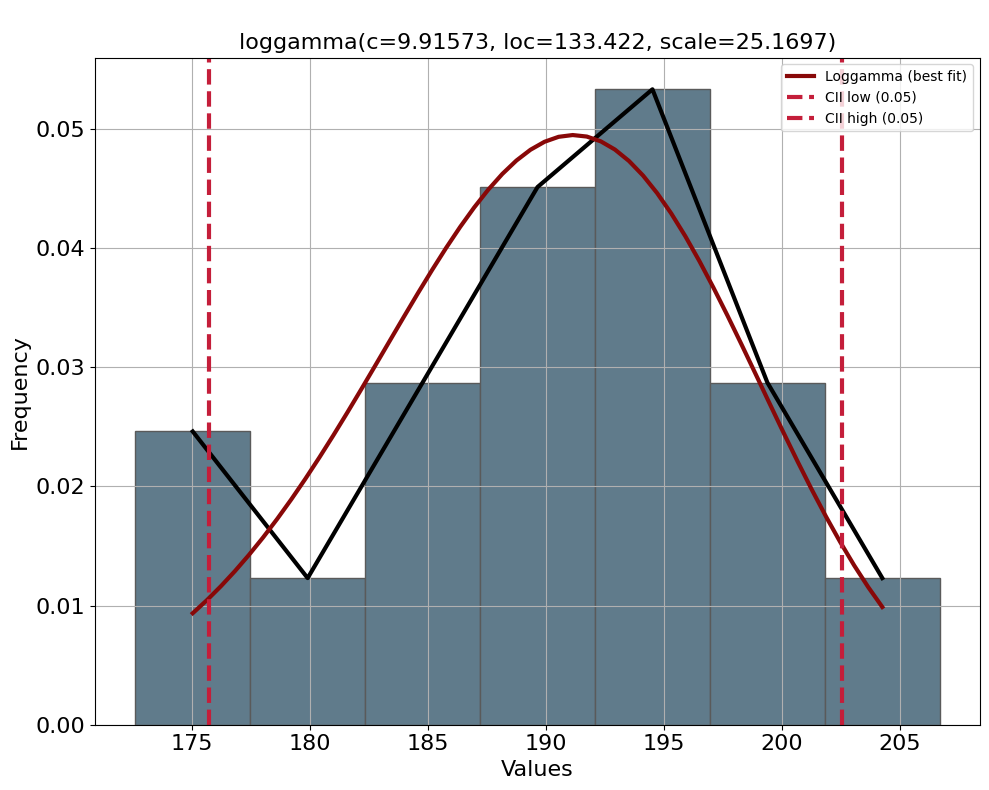

In [69]:
datos_nuevos = np.array([191.088,178.781,199.534,191.382,173.618,193.244,185.665,192.927,175.524,189.795,176.583,187.396,198.267,
181.183, 186.406, 197.473,193.006,192.881,187.241,187.850,193.267,192.581,195.991,200.364, 188.597, 188.870,191.077,206.708,190.292,
198.489,198.414,174.540,194.575,184.283,194.842, 186.476,196.176,183.730,197.700,184.097,203.231, 192.099,177.140, 172.582, 188.939,
183.386,180.174,195.355,193.626,206.255
])
d_nuevo = distfit(todf=False)
d_nuevo.fit_transform(datos_nuevos, verbose=False)
print(d_nuevo.model)

d_nuevo.plot(figsize=(10, 8))
plt.tight_layout()